In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_blobs
from pathlib import Path

import os
import glob2

In [3]:
p = 3
k = 4
inst_name = 'ruspini'

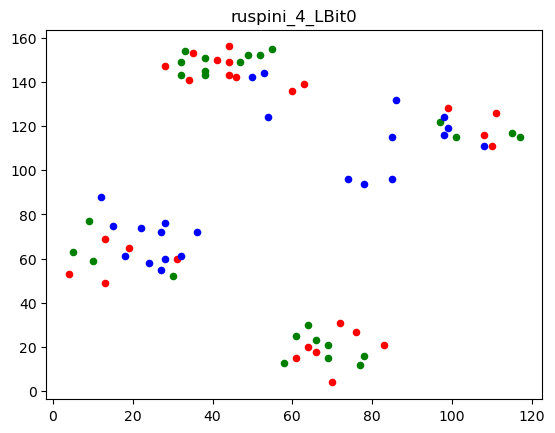

Done!


In [6]:
result_path = os.getcwd() + '\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
color_map = ["r", "g", "b", "y", "m", "o", "w", "c", "v"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if "LBit" in str(file):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=range(4,4+k))
            n = point.shape[0]
            for j in range(n):
                color= color_map[np.argwhere(cls[j, :]==1)[0].item()]
                p = part[j]
                mark = marker_map[p-1]
                #plt.scatter(data[j,0], data[j,1], s=20, marker=mark, c=color, label=p)
                plt.scatter(data[j,0], data[j,1], s=20, c=color_map[p-1], label=p)
            file = Path(file).stem
            plt.title(file)
            # plt.legend(np.unique(part))
            plt.savefig(file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')

In [ ]:
result_path = os.getcwd() + '\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
color_map = ["r", "g", "b", "y", "m", "o", "w", "c", "v"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if "LBit" in str(file):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=range(4,4+k))
            n = point.shape[0]
            for j in range(n):
                color= color_map[np.argwhere(cls[j, :]==1)[0].item()]
                p = part[j]
                mark = marker_map[p-1]
                plt.scatter(data[j,0], data[j,1], s=20, c=color, label=p)
            file = Path(file).stem
            plt.title(file)
            #plt.legend(labels=np.unique(part), markers=simbol[0:np.unique(part).size])
            plt.savefig(file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')

In [29]:
result_path = os.getcwd() + '\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
if os.path.exists(result_path):
    print("esiste")
    for file in glob2.glob(result_path + "*.txt"):
        if "UBit" in str(file):
            point = np.loadtxt(file, usecols=0)
            data = np.loadtxt(file, usecols=range(1,3))
            cls = np.loadtxt(file, usecols=range(3,3+k))
            n = point.shape[0]
            categories = np.zeros(n)
            for j in range(n):
                categories[j] = np.argwhere(cls[j, :]==1)[0].item()
            file = Path(file).stem
            plt.title(file)
            plt.scatter(data[:,0], data[:,1], s=5, c=categories)
            plt.savefig(file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')

Done!


In [9]:
os.getcwd()


'C:\\Users\\moden\\OneDrive - uniroma1.it\\Documenti\\Esercizi_ingegneria\\TRENI'